# Time Series Cross Validation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [11]:
dow_jones = fetch_openml(name='Dow-Jones-Industrial-Average-Dataset', version=1, as_frame=True)

data = dow_jones.data.loc[:2499].copy()

In [12]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change_%
2495,"Feb 01, 2010","10,185.53","10,068.99","10,227.24","10,068.99",-,1.17
2496,"Jan 29, 2010","10,067.33","10,122.04","10,272.29","10,014.35",-,-0.52
2497,"Jan 28, 2010","10,120.46","10,236.92","10,310.68","10,023.80",-,-1.13
2498,"Jan 27, 2010","10,236.16","10,194.29","10,294.13","10,060.98",-,0.41
2499,"Jan 26, 2010","10,194.29","10,195.35","10,323.00","10,102.17",-,-0.03


In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)
data['Open'] = data['Open'].str.replace(',', "").astype(float)
data['Price'] = data['Price'].str.replace(',', "").astype(float)
price = data['Price']

In [14]:
data.tail()

,Price,Open,High,Low,Vol.,Change_%
Date,,,,,,
2019-12-24,28515.45,28572.57,"28,576.80","28,503.21",95.29M,-0.13
2019-12-26,28621.39,28539.46,"28,624.10","28,535.15",155.97M,0.37
2019-12-27,28645.26,28675.34,"28,701.66","28,608.98",184.93M,0.08
2019-12-30,28462.14,28654.76,"28,664.69","28,428.98",185.07M,-0.64
2019-12-31,28538.44,28414.64,"28,547.35","28,376.49",193.34M,0.27


In [15]:
from sklearn.model_selection import TimeSeriesSplit

In [25]:
def visualize():
    # Visualize
    fig, axs = plt.subplots(5, 1, figsize=(15, 25), sharex=True)
    fig.suptitle("Time-Based Cross-Validation")
    
    train_color = "lightblue"
    test_color = "coral"
    
    for i, (train_index, test_index) in enumerate(tscv.split(price)):
        train_data = price.iloc[train_index]
        test_data = price.iloc[test_index]
    
        ax = axs[i]
    
        ax.plot(price.index, price.values, label="Close Price", color="gray", alpha=0.5)
        ax.plot(train_data.index, train_data.values, color=train_color, label="Training set")
        ax.plot(test_data.index, test_data.values, color=test_color, label="Test (Validation) set")
        ax.axvspan(test_data.index[0], test_data.index[-1], color=test_color, alpha=0.3)
        ax.axvspan(train_data.index[0], train_data.index[-1], color=train_color, alpha=0.3)
    
        ax.set_title(f"Iteration {i+1}")
        ax.set_ylabel("Close Price")
        ax.legend(loc="upper left")
    
    axs[-1].set_xlabel("Date")
    
    plt.show()

In [29]:
tscv = TimeSeriesSplit(n_splits=5)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

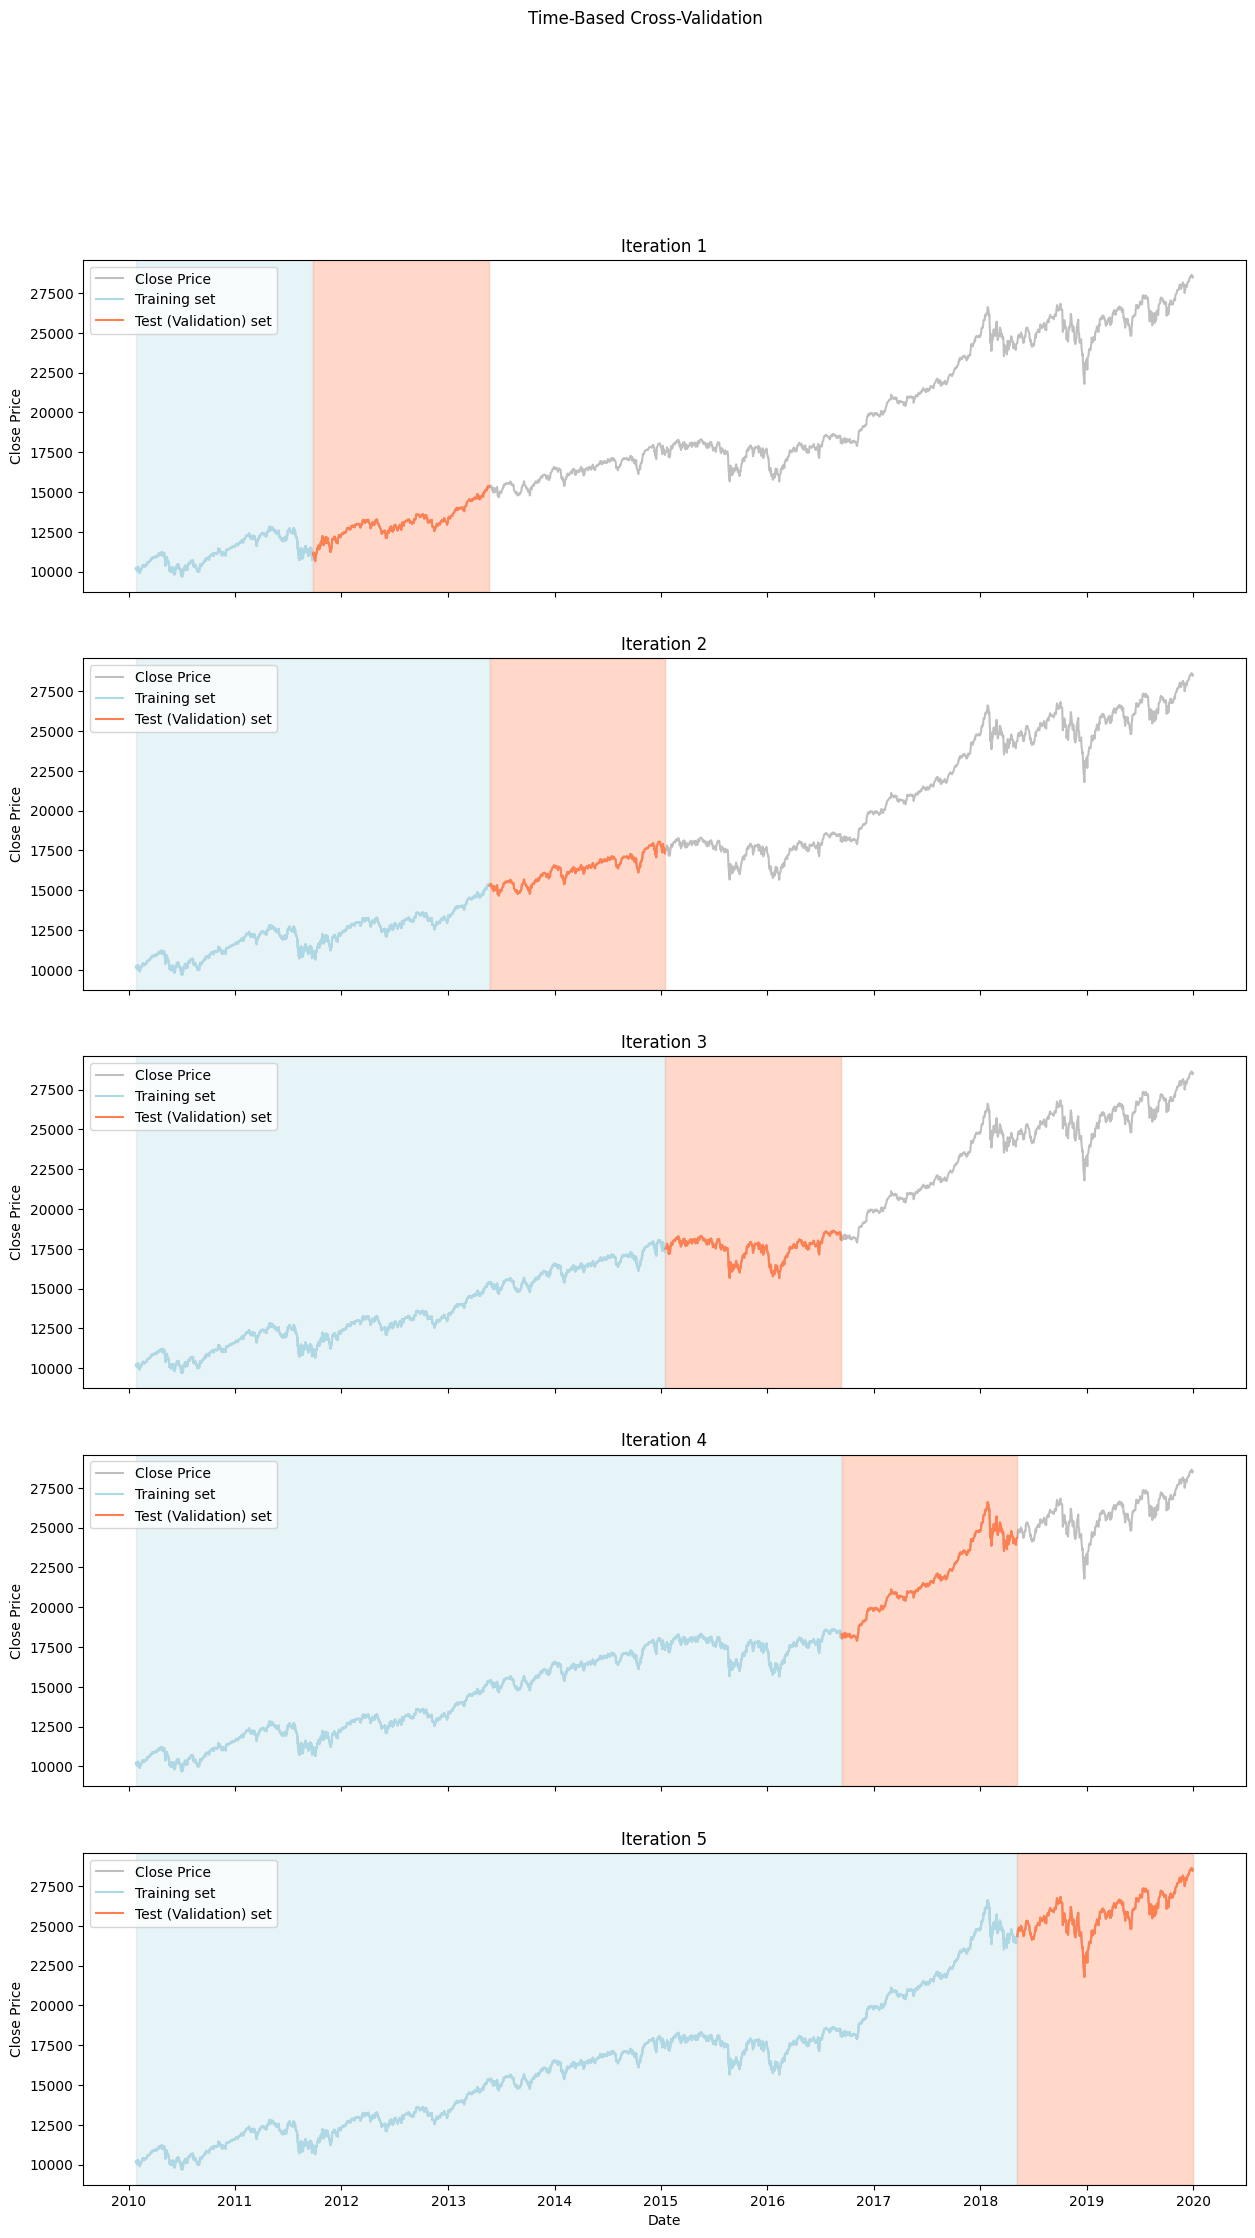

In [30]:
visualize()

In [31]:
tscv = TimeSeriesSplit(n_splits=5, gap=30)

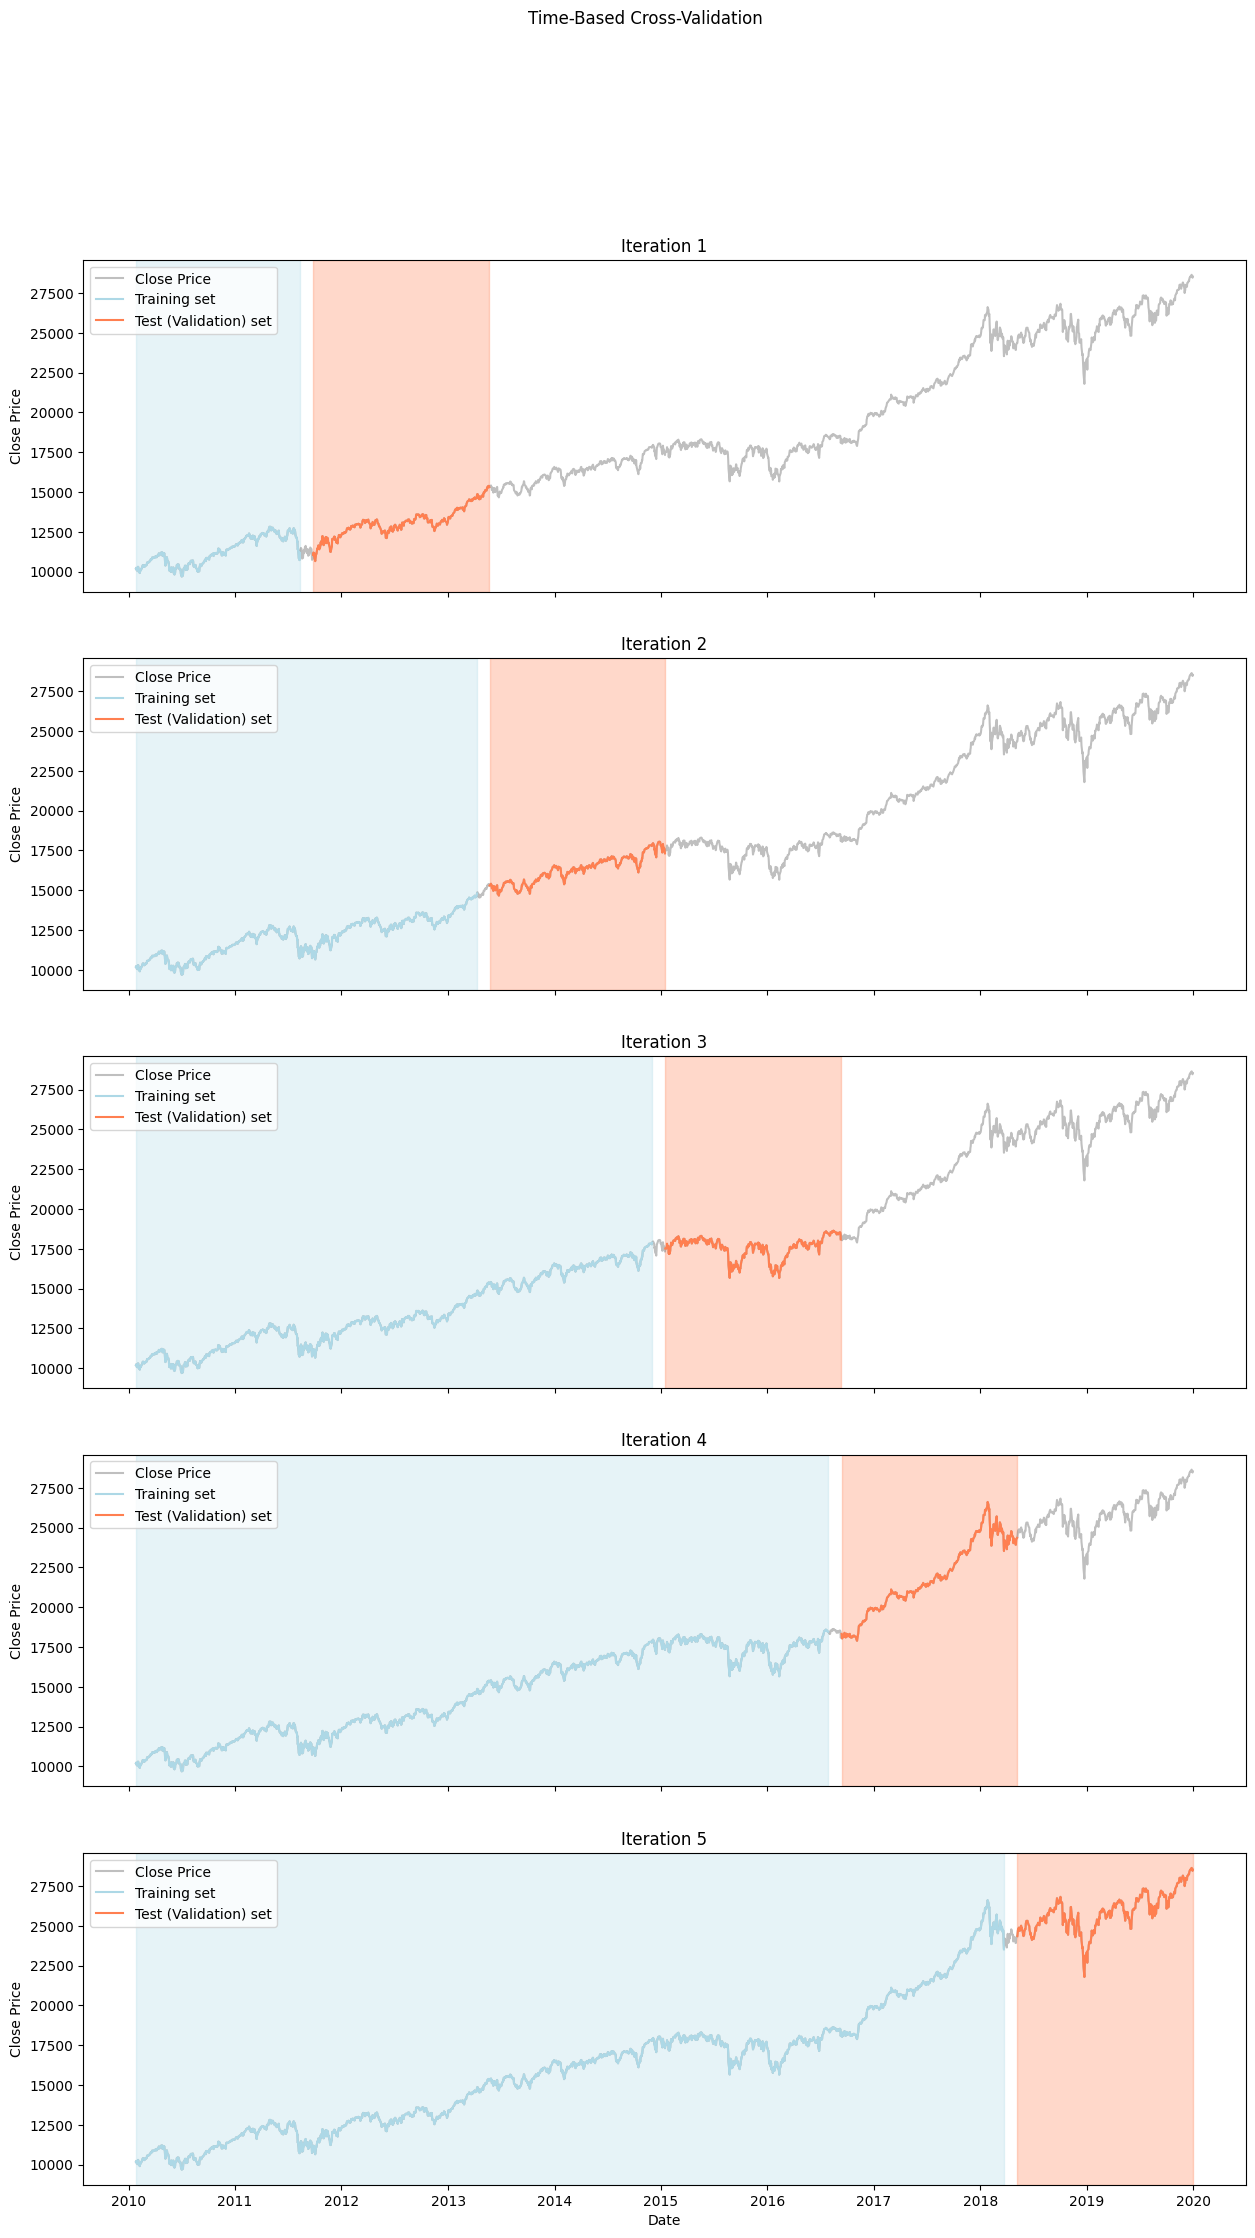

In [32]:
visualize()

In [33]:
tscv = TimeSeriesSplit(n_splits=5,max_train_size=1000)

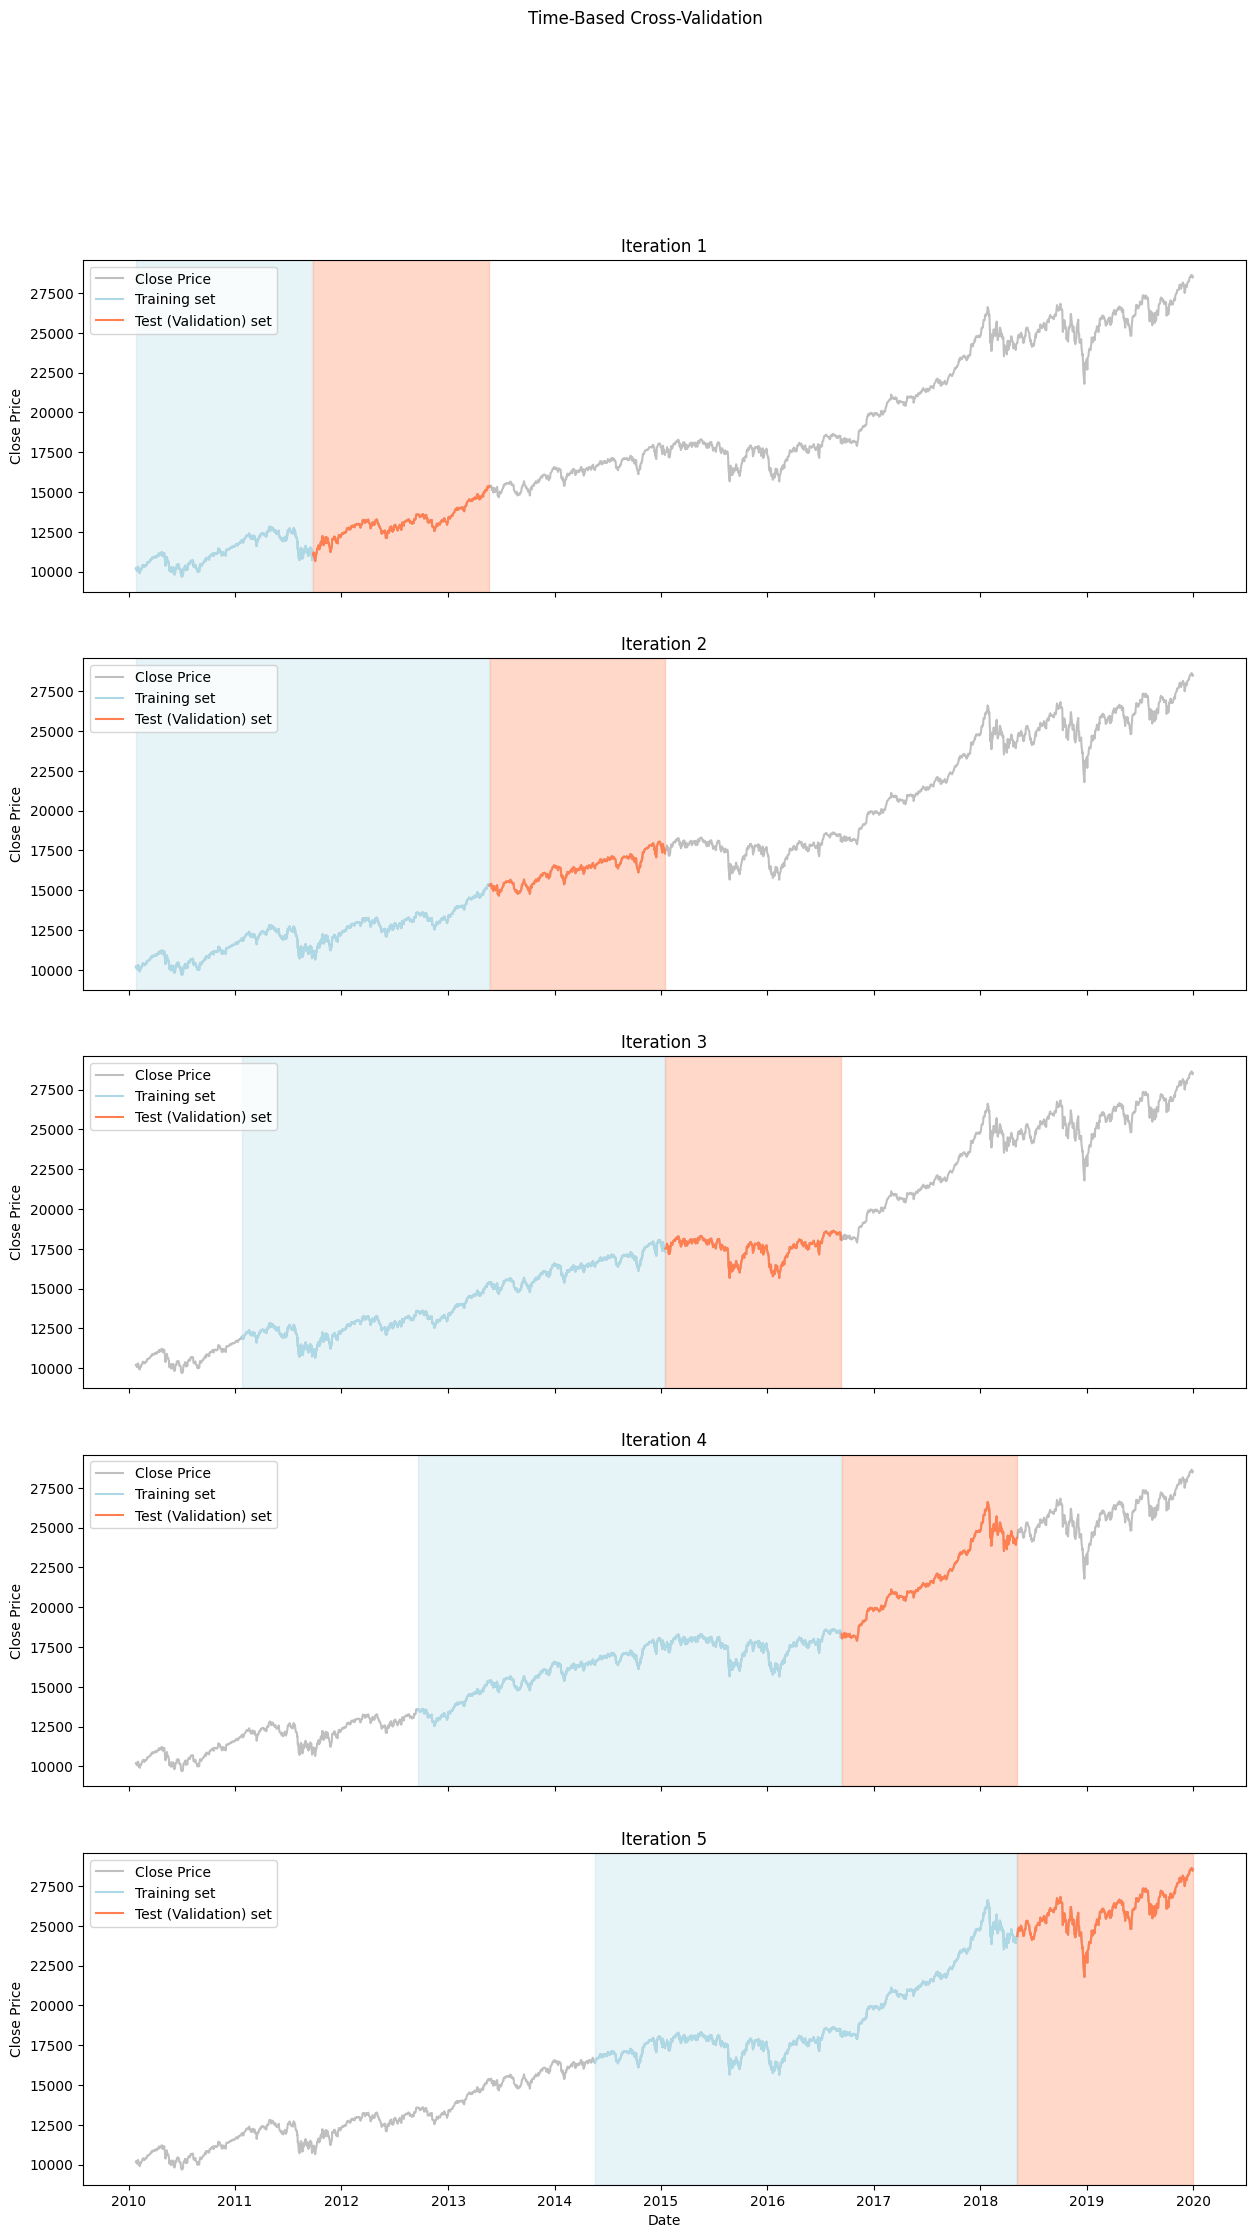

In [34]:
visualize()

In [35]:
tscv = TimeSeriesSplit(n_splits=5,max_train_size=500, test_size=100)

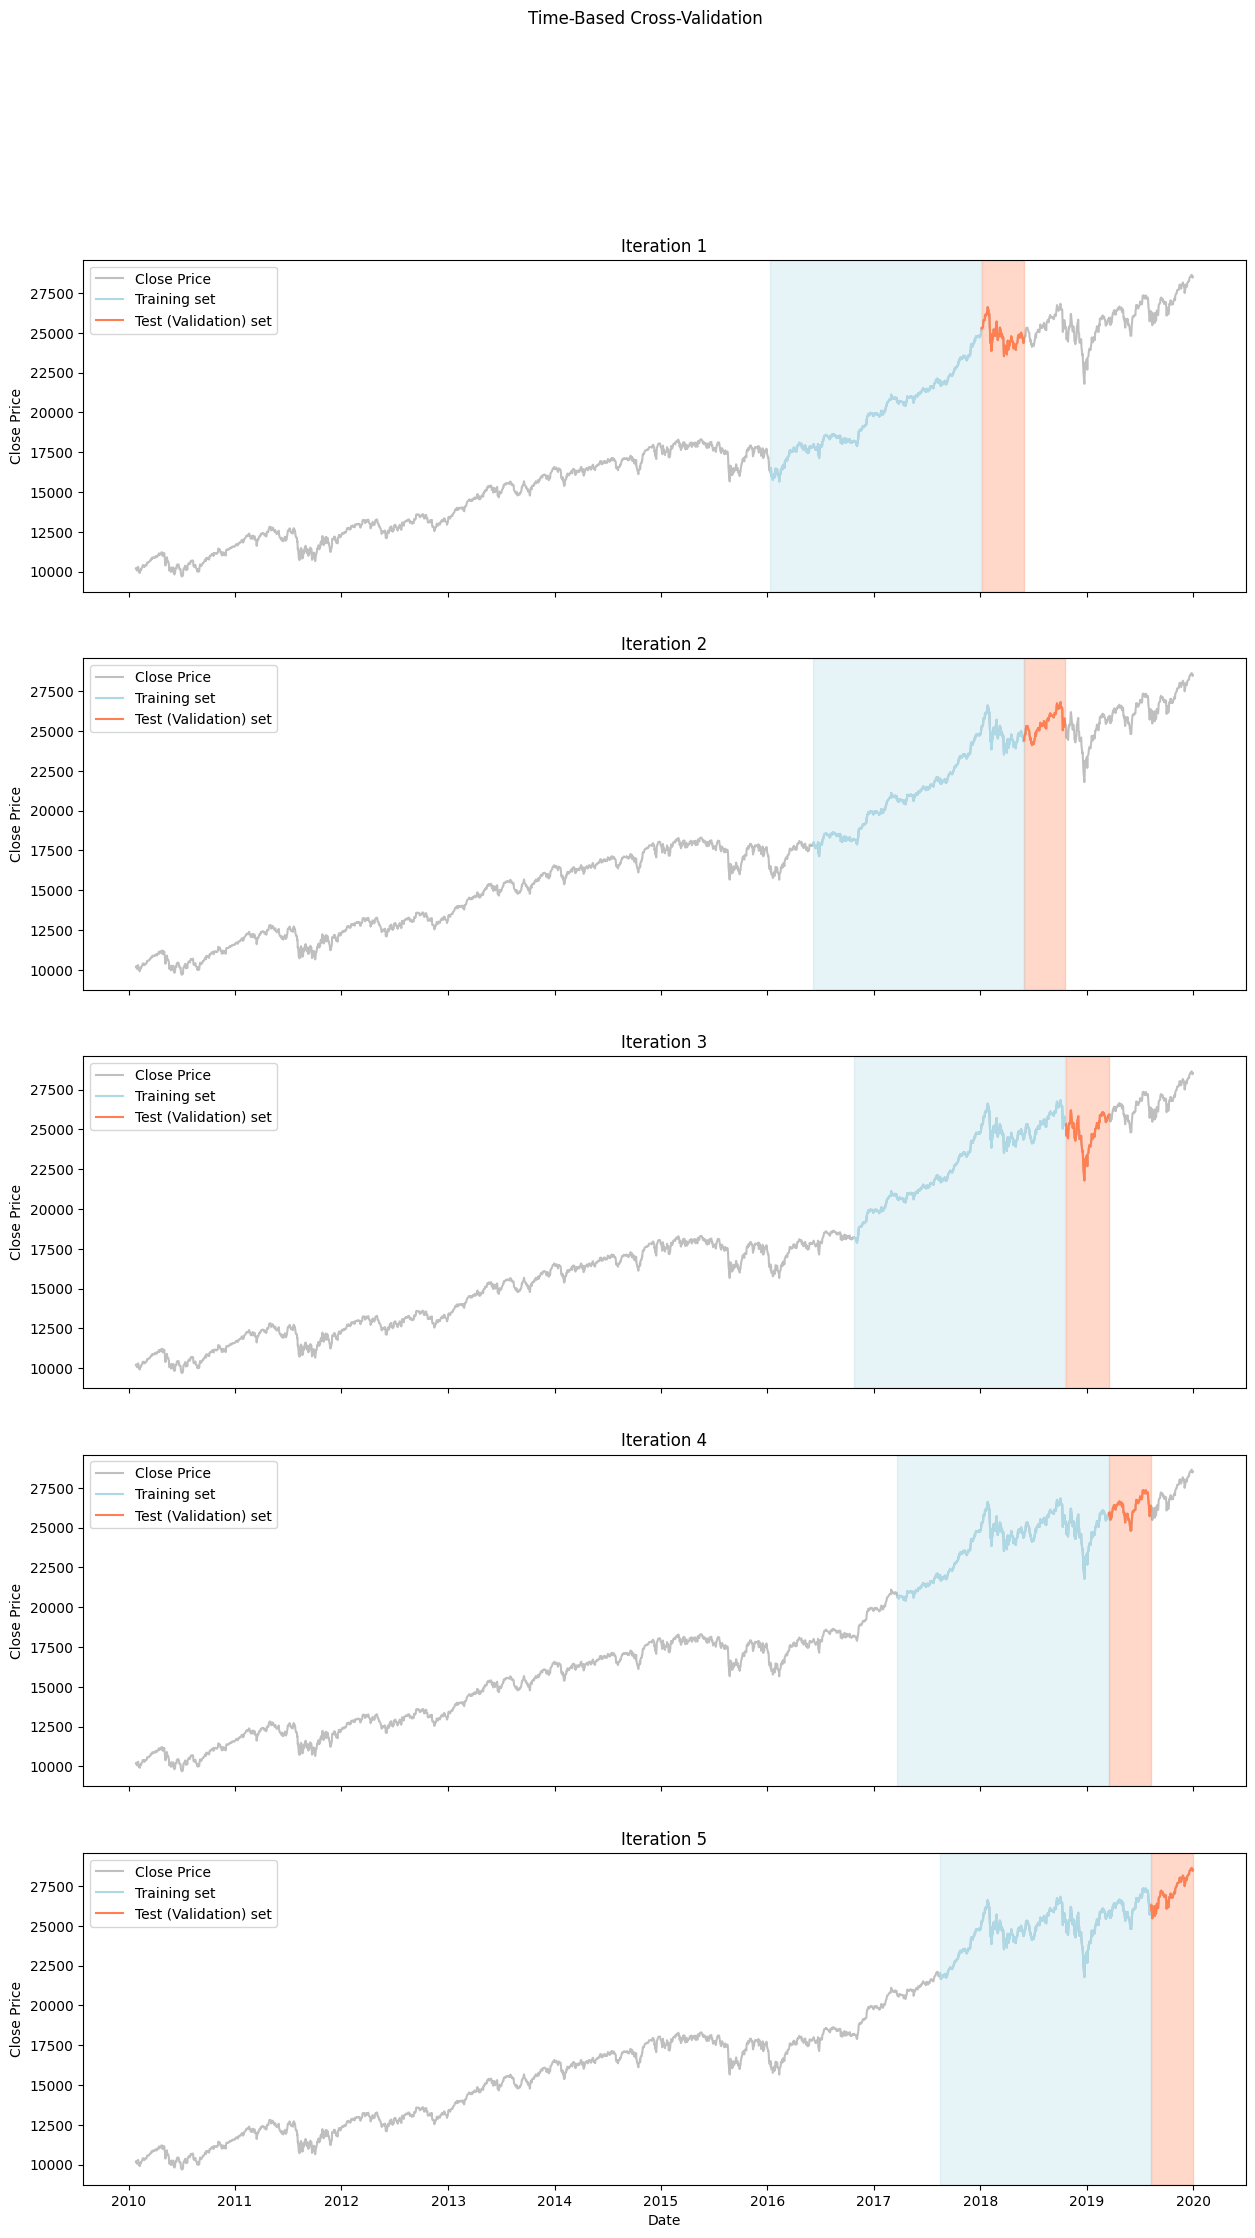

In [36]:
visualize()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [38]:
X_train = data[['Open']]
y_train = data['Price']

In [39]:
X_train.tail()

,Open
Date,
2019-12-24,28572.57
2019-12-26,28539.46
2019-12-27,28675.34
2019-12-30,28654.76
2019-12-31,28414.64


In [40]:
y_train.tail()

Date
2019-12-24    28515.45
2019-12-26    28621.39
2019-12-27    28645.26
2019-12-30    28462.14
2019-12-31    28538.44
Name: Price, dtype: float64

In [42]:
tcsv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=tscv)
print('Cross-Validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-Validation scores: [0.83630222 0.94971242 0.91993704 0.93758794 0.96093807]
Mean cross-validation score: 0.9208955376685349
